## Supreme Court Forecasting Project

we'll be using the dataset stevens.csv to build trees in R. Please download the dataset to follow along. This data comes from the [Supreme Court Forecasting Project](http://wusct.wustl.edu/data.php) website.

### CART in R

In [1]:
stevens = read.csv('./dataset/stevens.csv')

In [2]:
str(stevens)

'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [3]:
library('caTools')

In [4]:
set.seed(3000)

In [5]:
spl = sample.split(stevens$Reverse, SplitRatio=0.7)

In [6]:
Train = subset(stevens, spl == TRUE)
Test = subset(stevens, spl == FALSE)

requires to install "rpart" packages
```R
install.package("rpart")
install.package("rpart.plot")
```

In [8]:
library("rpart")
library("rpart.plot")

In [9]:
StevensTree = rpart(Reverse ~ Circuit + Issue + Petitioner + 
                    Respondent + LowerCourt + Unconst, data=Train, method="class", minbucket=25)

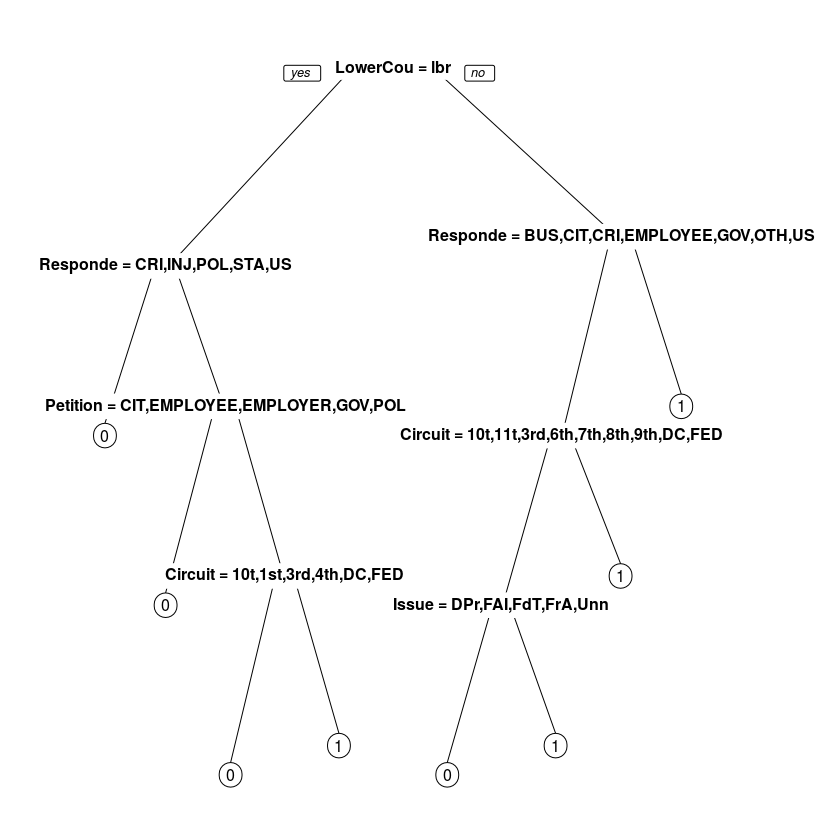

In [10]:
prp(StevensTree)

In [11]:
PredictCART = predict(StevensTree, newdata=Test, type='class')

In [12]:
table(Test$Reverse, PredictCART)

   PredictCART
     0  1
  0 41 36
  1 22 71

In [13]:
(41 + 71) / (41 + 36 + 22 + 71)

[1] 0.6588235

In [14]:
library("ROCR")

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [15]:
PredictROC = predict(StevensTree, newdata=Test)
PredictROC

,0,1
1,0.3035714,0.6964286
3,0.3035714,0.6964286
4,0.4000000,0.6000000
6,0.4000000,0.6000000
8,0.4000000,0.6000000
21,0.3035714,0.6964286
32,0.5517241,0.4482759
36,0.5517241,0.4482759
40,0.3035714,0.6964286
42,0.5517241,0.4482759


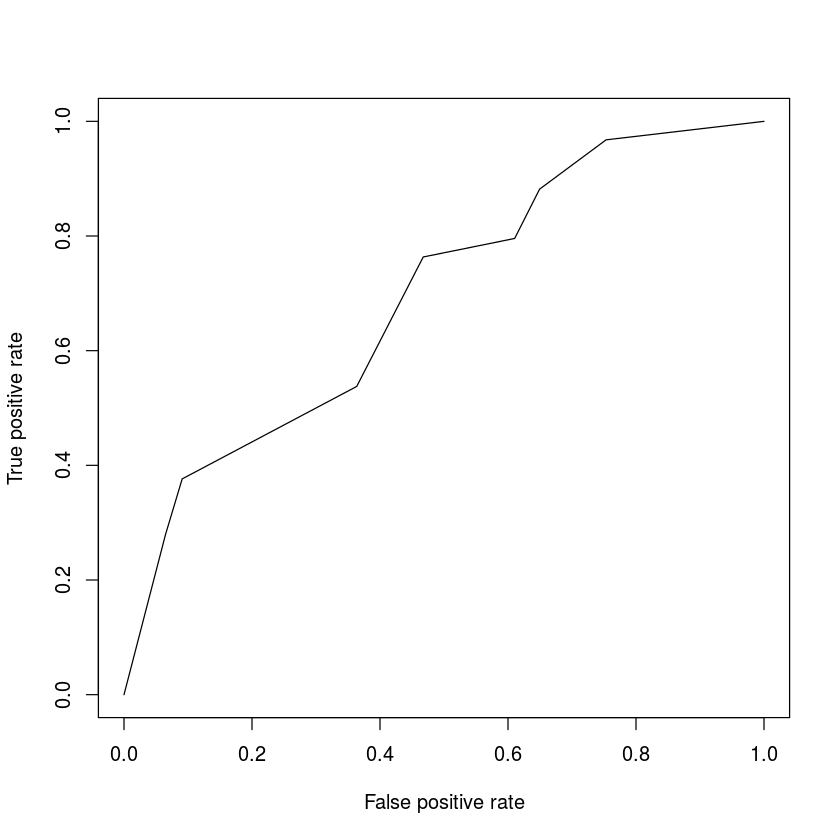

In [17]:
pred = prediction(PredictROC[,2], Test$Reverse)
perf = performance(pred, "tpr", "fpr")
plot(perf)